In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
warnings.filterwarnings("ignore")
import os
print(os.listdir("../input"))



# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


**Problem statement:** Analyse the data and draw inferences from the shopping behavior of a group of customers. Also, to write an prediction module to predict what kind of shopping habits would a given customer have.

**Loading and Describing the data**
We should first load the data, and describe the data statistically. This will help us understand the data and the data types.

In [31]:
data = pd.read_csv("../input/Mall_Customers.csv")

pd.set_option('display.max_columns', 10)

print("Data Sample\n{}\n".format(data.head()))
print("Data description\n{}\n".format(data.describe()))
print("Data types\n{}\n". format(data.dtypes))

Data Sample
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data description
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000

In [32]:
# getting the list of columns

columns = data.columns

print(columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


**Data Visualisation**

Now that we have looked at the data, it's time we visualize the data, to view the correlation of the attributes with other attributes. This way we can analyse the data.

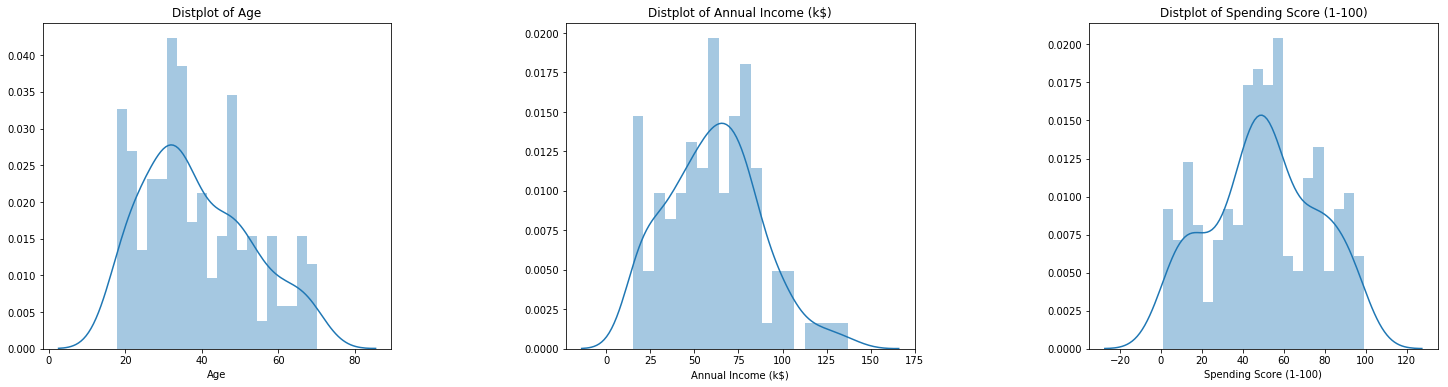

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

n=0

plt.figure(1, figsize = (25,6))

for i in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n = n+1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(data[i], bins=20)
    plt.title("Distplot of {}".format(i))
plt.show()

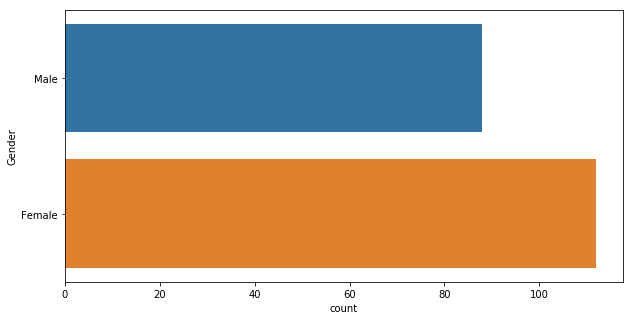

In [34]:
# plot of Male count Vs Female count
plt.figure(1, figsize = (10,5))
sns.countplot(y = 'Gender', data = data)
plt.show()

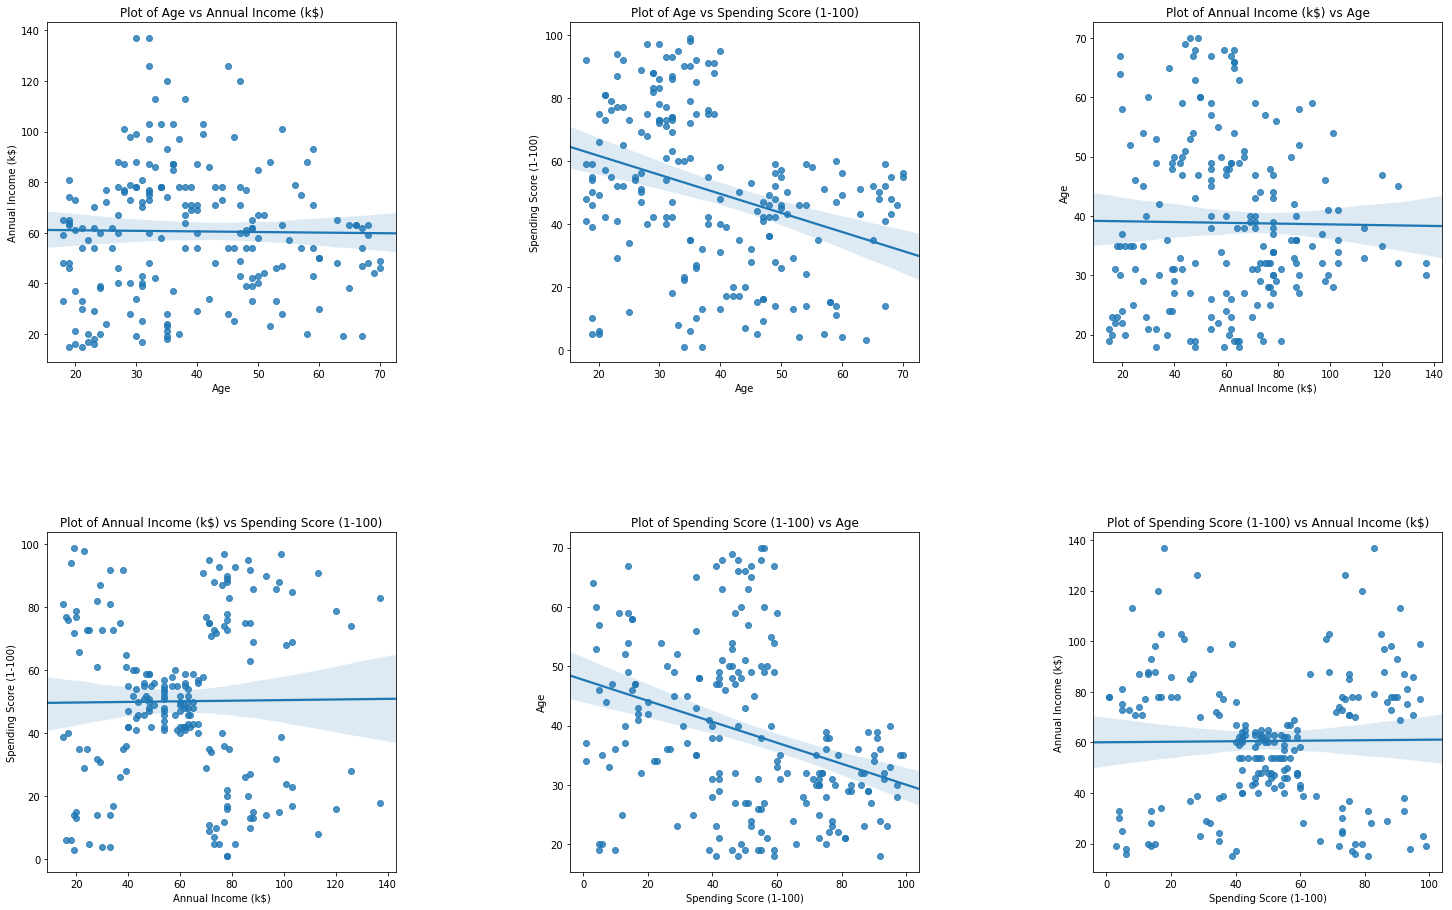

In [35]:
# plotting [Age, income, spending score] with one another

plt.figure(1, figsize = (25,25))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        if( x != y ):
            n = n + 1
            plt.subplot(3, 3, n)
            plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
            sns.regplot(x = x, y = y, data = data)
            plt.title("Plot of {} vs {}".format(x,y))

plt.show()

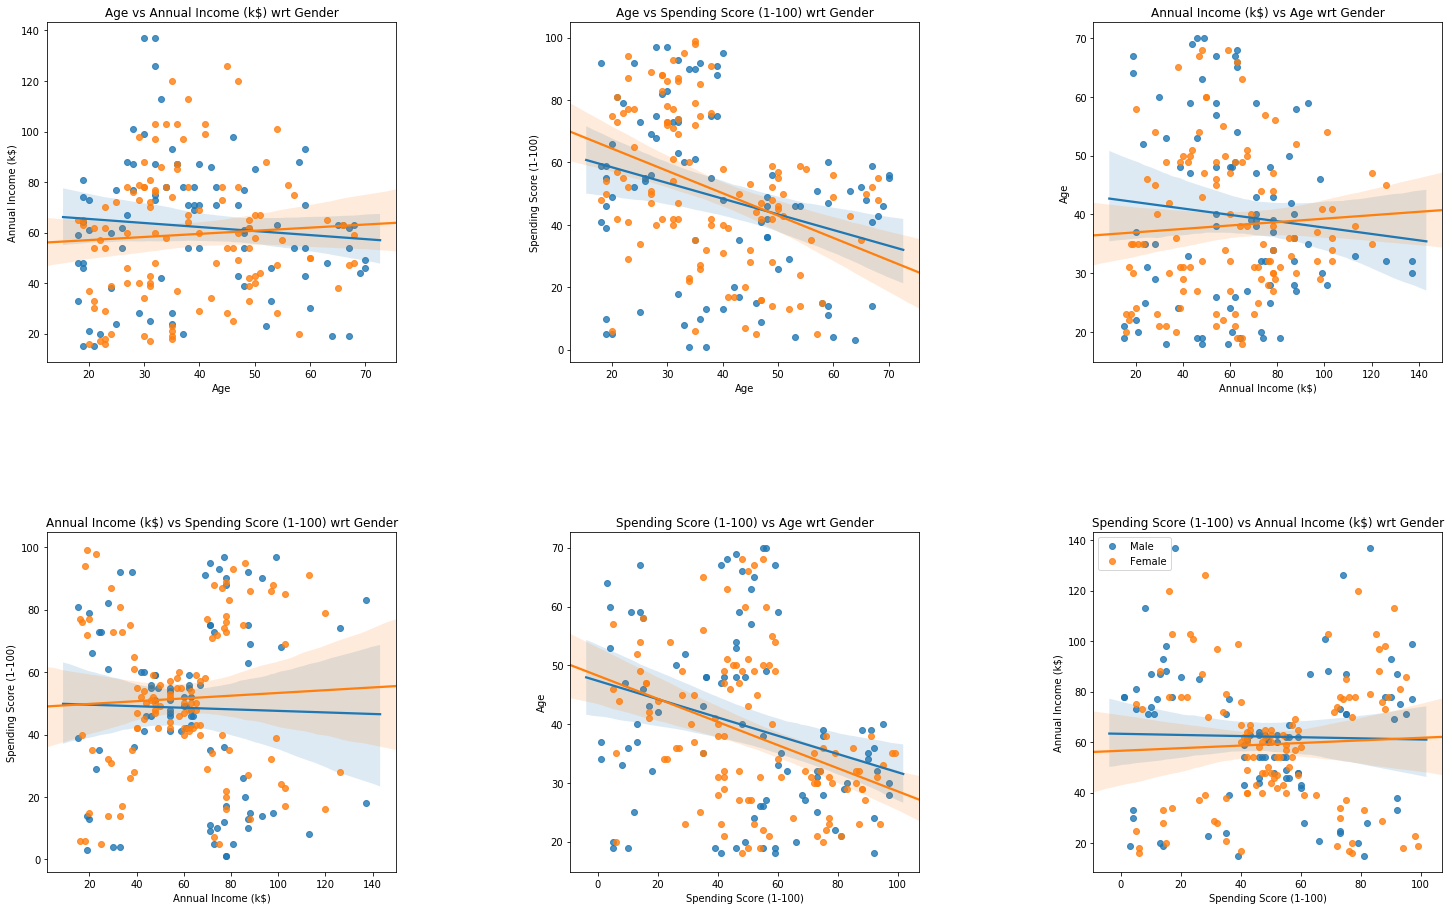

In [36]:
# plotting Age vs Annual income wrt Gender

plt.figure(1, figsize = (25,25) )
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        if( x != y ):
            n = n + 1
            plt.subplot(3, 3, n)
            plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
            for gender in ['Male', 'Female']:
                sns.regplot(x = x, y = y, data = data[ data['Gender'] == gender ], label = gender)
                plt.title("{} vs {} wrt Gender".format(x,y))
plt.legend()
plt.show()

From the above visualisations, the following inferences can be drawn.

1. The cusotmers can be clustered on the basis of Annual income and spending score, wrt gender.
2. Gender probably doesn't have much effect on clustering customers based on Annual Income and spending score
3. Spending score drops significantly more with increasing Age in FEMALES than in MALES
4. Trends in Spending score vs Annual income vs Age wrt gender can be studied.

Text(0.5, 1.0, 'Plot for K vs Distortions')

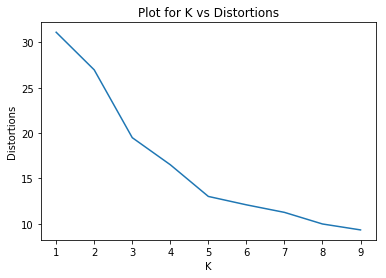

In [37]:
# applying Elbow method to calculate the optimum K
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

attr = ['Annual Income (k$)', 'Spending Score (1-100)']

K = range(1,10)
distorts = []
for k in K:
    kmeans = KMeans(k)
    kmeans.fit(data[attr])
    distorts.append(sum(np.min(cdist(data[attr], kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

plt.plot(K, distorts)
plt.xlabel('K')
plt.ylabel('Distortions')
plt.title("Plot for K vs Distortions")

In [38]:
# Applying K means clustering on Annual Income and Spending score

attr = ['Annual Income (k$)', 'Spending Score (1-100)']

# From the result of the elbow algorithm, the elbow occurs at K = 5

N = 5

kmeans = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                tol=0.0001,  random_state= 111  , algorithm='elkan')

kmeans.fit(data[attr])

centroids = kmeans.cluster_centers_

print("The centroids are:{}".format(centroids))

cluster = kmeans.fit_predict(data[attr])

data['cluster'] = cluster

The centroids are:[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


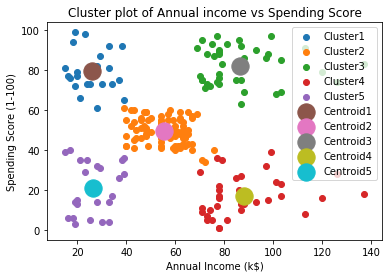

In [39]:
# visualising the clusters and the centroids.


for c in range(0,5):
    plt.scatter(x = data[data['cluster'] == c]['Annual Income (k$)'], 
               y = data[data['cluster'] == c]['Spending Score (1-100)'], label = 'Cluster{}'.format(c+1))

for c in range(0,5):
    plt.scatter(x = centroids[c][0], 
               y = centroids[c][1],s = 300, label = 'Centroid{}'.format(c+1))
    
plt.title("Cluster plot of Annual income vs Spending Score")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

We can hence cluster a set of customers into 5 groups based on their income and shopping behavior.

The above plot visualisation produces the following information

1. The data is clustered into 5 types of customer:
    1. High spending score & low income
    2. High spending score & high income
    3. Medium spending score & medium income
    4. low spending score & low income
    5. low spending score & high income
2. The customers within the "High income" group should be targetted for serious advertising.
3. The customers within the "high spending score and low income" should be analysed wrt Gender and Age, to understand the expenditure trends of the "low income" group of customers.